# Assignment on Measures of Central Tendency and Dispersion

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statistics as stat

An Institution wishes to find out their student’s ability in mathematics, reading
and writing skills. The Institution wants to do an exploratory study to check the
following information. (data is provided)

In [2]:
df = pd.read_csv('/content/StudentsPerformance.csv')

In [3]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [6]:
df.isnull().sum() #Checking null values

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

1. Find out how many males and females participated in the test.

In [7]:
#Genderwise participation
print("Number of Females and Males attended the test:")
gp = df['gender'].value_counts().reset_index()
gp

Number of Females and Males attended the test:


,index,gender
0,female,518
1,male,482


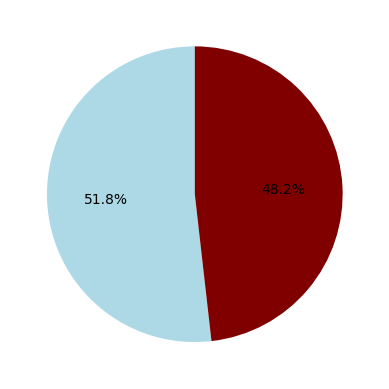

In [10]:
plt.pie(gp['gender'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'maroon'])
plt.show()

2. What do you think about the students' parental level of education?

In [14]:
#Distribution of Parental Education
print('Parental level of education:\n')
ple_df = df['parental level of education'].value_counts().reset_index()
ple_df

Parental level of education:



,index,parental level of education
0,some college,226
1,associate's degree,222
2,high school,196
3,some high school,179
4,bachelor's degree,118
5,master's degree,59


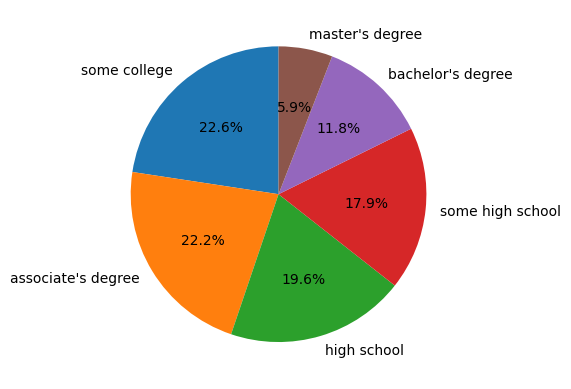

In [ ]:
plt.pie(ple_df['parental level of education'], labels = ple_df['index'], autopct='%1.1f%%', startangle=90 )
plt.show()

In [20]:
print('Majority of the parents has an educational level of',stat.mode(df['parental level of education']))
print("The minority of parent's has a", ple_df['index'].iloc[-1])

Majority of the parents has an educational level of some college
The minority of parent's has a master's degree


3. Who scores the most on average for math, reading and writing based on
   
    
*   Gender
*   Test preparation course





In [50]:
##Scores on average for math, reading and writing based on Gender

gd_avg = df.groupby('gender').agg({'math score': 'mean','reading score': 'mean','writing score': 'mean'}).reset_index()

print(gd_avg.loc[gd_avg['math score'].idxmax(), 'gender'], " students scored more on average in Math ")
print(gd_avg.loc[gd_avg['reading score'].idxmax(), 'gender'], " students scored more on average in Reading")
print(gd_avg.loc[gd_avg['writing score'].idxmax(), 'gender'], " students scored more on average in Writing\n")

gd_avg

male  students scored more on average in Math 
female  students scored more on average in Reading
female  students scored more on average in Writing



,gender,math score,reading score,writing score
0,female,63.376448,72.590734,72.467181
1,male,68.821577,65.545643,63.446058


In [25]:
print('Mode of Math Score is', stat.mode(df['math score']))
print('Mode of Reading Score is', stat.mode(df['reading score']))
print('Mode of Writing score is', stat.mode(df['writing score']))

Mode of Math Score is 65
Mode of Reading Score is 72
Mode of Writing score is 74


In [44]:
##Scores on average for math, reading and writing based on Test Preparation Course

tpc_avg = df.groupby('test preparation course').mean()[['math score', 'reading score', 'writing score']].reset_index()

print("Students with Test Preparation course status as", f"'{tpc_avg.loc[tpc_avg['math score'].idxmax(), 'test preparation course']}'", "scored better in Maths")
print("Students with Test Preparation course status as", f"'{tpc_avg.loc[tpc_avg['reading score'].idxmax(), 'test preparation course']}'", "scored better in Reading")
print("Students with Test Preparation course status as", f"'{tpc_avg.loc[tpc_avg['writing score'].idxmax(), 'test preparation course']}'", "scored better in Writing")

tpc_avg

Students with Test Preparation course status as 'completed' scored better in Maths
Students with Test Preparation course status as 'completed' scored better in Reading
Students with Test Preparation course status as 'completed' scored better in Writing


<ipython-input-44-4a57819023da>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tpc_avg = df.groupby('test preparation course').mean()[['math score', 'reading score', 'writing score']].reset_index()


,test preparation course,math score,reading score,writing score
0,completed,69.96648,74.175978,74.684358
1,none,63.78972,66.417445,64.457944


In [43]:
##Scores on average for math, reading and writing based on Gender and Test Preparation Course
print('Average score in each section, grouped by Gender and Test Preparation Score:')
gd_tpc_avg = df.groupby(['gender', 'test preparation course']).agg({'math score': 'mean','reading score': 'mean','writing score': 'mean'}).reset_index()

#Math
max_math = gd_tpc_avg.loc[gd_tpc_avg['math score'].idxmax()]
print("\nStatus of maximum average scorer in Math")
print(f"Gender: {max_math['gender']}, Test Preparation Course: {max_math['test preparation course']}, Score: {max_math['math score']}")

#Reading
max_reading = gd_tpc_avg.loc[gd_tpc_avg['reading score'].idxmax()]
print("\nStatus of maximum average scorer in Reading")
print(f"Gender: {max_reading['gender']}, Test Preparation Course: {max_reading['test preparation course']}, Score: {max_reading['reading score']}")

#Writing
max_writing = gd_tpc_avg.loc[gd_tpc_avg['writing score'].idxmax()]
print("\nStatus of maximum average score in Writing:")
print(f"Gender: {max_writing['gender']}, Test Preparation Course: {max_writing['test preparation course']}, Score: {max_writing['writing score']}")
print("\n")
gd_tpc_avg

Average score in each section, grouped by Gender and Test Preparation Score:

Status of maximum average scorer in Math
Gender: male, Test Preparation Course: completed, Score: 72.98850574712644

Status of maximum average scorer in Reading
Gender: female, Test Preparation Course: completed, Score: 77.375

Status of maximum average score in Writing:
Gender: female, Test Preparation Course: completed, Score: 78.79347826086956




,gender,test preparation course,math score,reading score,writing score
0,female,completed,67.108696,77.375000,78.793478
1,female,none,61.320359,69.955090,68.982036
2,male,completed,72.988506,70.793103,70.339080
3,male,none,66.467532,62.581169,59.551948


In [40]:
gd_tpc_avg.describe()

,math score,reading score,writing score
count,4.000000,4.000000,4.000000
mean,66.971273,70.176091,69.416636
std,4.775373,6.053558,7.879869
min,61.320359,62.581169,59.551948
25%,65.180739,68.111610,66.624514
50%,66.788114,70.374097,69.660558
75%,68.578648,72.438578,72.452680
max,72.988506,77.375000,78.793478


4. What do you think about the scoring variation for math, reading and writing based on

*   Gender
*   Test preparation course

In [63]:
#Gender based standard deviation

print("Scoring Variation based on Gender:\n")
std_gd = df.groupby('gender').std(numeric_only=True).reset_index()

print(std_gd.loc[std_gd['math score'].idxmax(), 'gender'], "students showed greater variation among Maths scores")
print(std_gd.loc[std_gd['reading score'].idxmax(), 'gender'], "students showed greater variation among Reading scores")
print(std_gd.loc[std_gd['writing score'].idxmax(), 'gender'], "students showed greater variation among Writing scores\n")

std_gd

Scoring Variation based on Gender:

female students showed greater variation among Maths scores
female students showed greater variation among Reading scores
female students showed greater variation among Writing scores



,gender,math score,reading score,writing score
0,female,16.029928,14.411018,14.844842
1,male,14.556411,14.149594,14.227225


In [64]:
#Test Preparation based Standard Deviation

print("Scoring Variation based on Test Preparation Course:\n")
std_tpc = df.groupby('test preparation course').std(numeric_only=True).reset_index()

print("Students with Test Preparation course status as",f"'{std_tpc.loc[std_tpc['math score'].idxmax(), 'test preparation course']}'", "showed greater variation among Maths scores")
print("Students with Test Preparation course status as",f"'{std_tpc.loc[std_tpc['math score'].idxmax(), 'test preparation course']}'", "showed greater variation among Reading scores")
print("Students with Test Preparation course status as",f"'{std_tpc.loc[std_tpc['math score'].idxmax(), 'test preparation course']}'", "showed greater variation among Writing scores\n")

std_tpc

Scoring Variation based on Test Preparation Course:

Students with Test Preparation course status as 'none' showed greater variation among Maths scores
Students with Test Preparation course status as 'none' showed greater variation among Reading scores
Students with Test Preparation course status as 'none' showed greater variation among Writing scores



,test preparation course,math score,reading score,writing score
0,completed,14.521847,13.537572,13.236412
1,none,15.705689,14.608896,15.041667


In [59]:
#Compiled data variation
print('Score variation in each section, grouped by Gender and Test Preparation Score:')
df.groupby(['gender', 'test preparation course']).std(numeric_only = True)

Score variation in each section, grouped by Gender and Test Preparation Score:


math score  reading score  writing score
gender test preparation course                                          
female completed                 14.428233      12.695493      12.240788
       none                      16.510686      14.636981      15.016497
male   completed                 14.039164      13.612420      12.887910
       none                      14.335746      13.595718      13.468284

5. The management needs your help to give bonus points to the top 25% of
students based on their math score, so how will you help the management
to achieve this.

In [66]:
 top_25 = df['math score'].quantile(0.75)
 print('Students with math scores more than', top_25, 'are eligible for bonus points')

 #df['bonus points'] = df['math score'].apply(lambda x: bonus_point if x > top_25 else 0)
 #bonus_point can be decided by the management. above code creates another column in the dataframe.

Students with math scores more than 77.0 are eligible for bonus points
